In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from sklearn.metrics import accuracy_score

In [3]:
sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TRAINING_DATA.csv')

testData1 =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/synthetic data/SyntheticDataMean.csv')

testData2 =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/synthetic data/SyntheticDataSD.csv')

In [4]:
X_train= sample.drop('Object_Held', axis=1)
y_train= sample[['Object_Held']]

X_test1= testData1.drop('Object_Held', axis=1)
y_test1= testData1[['Object_Held']]

X_test2= testData2.drop('Object_Held', axis=1)
y_test2= testData2[['Object_Held']]

In [5]:
X_train.columns = sample.columns[:-1]
cols=sample.columns[:-1]

## Standard Scaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar = StandardScaler().fit(X_train)
scalar
X_train= scalar.transform(X_train)


In [7]:
X_test1 = scalar.transform(X_test1)
X_test1= pd.DataFrame(X_test1)

In [8]:
X_test2 = scalar.transform(X_test2)
X_test2= pd.DataFrame(X_test2)

In [9]:
X_train= pd.DataFrame(X_train)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,...,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05
mean,-3.907985e-17,-1.560461e-16,-6.176256e-17,6.784317e-17,-2.022314e-17,-5.260749e-17,-3.019807e-17,-9.701641e-17,1.236618e-17,-1.143017e-16,...,-2.206782e-16,-3.432468e-16,6.843073e-16,7.283063e-17,5.465713e-17,8.786134e-17,-3.672276e-17,1.242083e-16,1.239009e-16,1.844678e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.605402e+00,-1.248291e+00,-2.246745e+00,-1.248546e+00,-6.350220e+00,-1.305912e+00,-3.195149e+00,-1.295883e+00,-4.681675e+00,-6.732455e-01,...,-3.112612e+00,-9.755294e-01,-1.280867e+01,-1.102282e+00,-6.423476e+00,-1.102734e+00,-1.841798e+00,-1.101600e+00,-2.437290e+00,-9.974051e-01
25%,-1.645376e-01,-6.754480e-01,-6.710739e-01,-6.742484e-01,-6.186799e-01,-7.031734e-01,-7.819924e-01,-7.261031e-01,-4.425446e-01,-4.743296e-01,...,-6.691405e-01,-7.510183e-01,-1.355671e-01,-6.703675e-01,-5.183116e-01,-6.712965e-01,-1.013549e+00,-6.715775e-01,-7.022957e-01,-6.549063e-01
50%,7.432692e-02,-3.127519e-01,-2.333536e-01,-3.109755e-01,2.366564e-02,-3.111647e-01,2.028513e-01,-2.818721e-01,-1.571730e-01,-2.535919e-01,...,-9.844896e-02,-4.646692e-01,1.026644e-01,-2.937640e-01,7.715062e-03,-2.932297e-01,1.835833e-01,-2.935803e-01,-1.973862e-01,-3.894644e-01
75%,3.554338e-01,5.623547e-01,3.366195e-01,5.595088e-01,7.712403e-01,5.972042e-01,7.023432e-01,5.831398e-01,2.195885e-01,4.074673e-02,...,5.206536e-01,5.050646e-01,5.383741e-01,4.905208e-01,5.390371e-01,4.941784e-01,5.058735e-01,4.940963e-01,7.202255e-01,5.020634e-01
max,5.266859e+00,1.227295e+01,3.527016e+00,1.234866e+01,3.912128e+00,6.994416e+00,3.050829e+00,7.716194e+00,6.092447e+00,6.581645e+01,...,4.528625e+00,1.045473e+01,2.056687e+00,1.291711e+01,7.064065e+00,1.297646e+01,3.773920e+00,1.295490e+01,6.115577e+00,1.318670e+01


In [10]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.001237,-0.562005,0.143693,-0.561186,1.132695,-0.581460,0.703277,-0.554737,1.702240,-0.268496,...,0.369193,-0.223620,0.030813,-0.406942,0.271385,-0.406965,-0.460160,-0.406620,0.959059,-0.834368
1,0.372108,-0.691038,-0.768247,-0.690303,0.297339,-0.720567,0.286861,-0.692858,-0.118163,-0.134019,...,-0.616987,-0.784924,0.274687,-0.433407,-0.793087,-0.432929,0.167742,-0.431884,-0.608672,-0.318472
2,0.505482,1.106595,0.187486,1.104899,0.006878,1.197858,-0.013534,1.277382,0.823701,1.245028,...,0.990880,1.777419,-0.453176,1.280640,0.605312,1.283491,-1.531943,1.278276,1.036024,1.378772
3,1.426969,1.830265,0.742504,1.819347,-0.944374,1.929172,1.334269,2.204570,1.388670,1.712917,...,1.024632,1.878729,-0.217164,1.889304,1.221976,1.895155,-1.426207,1.898388,1.704054,2.042494
4,0.148327,-0.388823,-0.412745,-0.387217,-0.133276,-0.389846,0.592301,-0.729773,-0.060959,-0.442120,...,-0.119779,-0.610623,0.049905,-0.460189,0.093849,-0.460537,0.225004,-0.460419,-0.229140,-0.351739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,1.577548,1.555610,-1.200091,1.473622,-0.865687,1.558200,1.725295,2.002929,1.537001,0.606938,...,-0.408299,-0.849901,2.041770,7.411156,-5.651900,7.511300,1.881164,7.496669,-1.569477,7.324830
103996,-3.917921,-0.629616,2.361776,-0.629387,-1.075969,-0.658262,-1.455619,-0.633374,0.739273,-0.464430,...,-0.918527,-0.759818,0.276820,-0.659086,-1.434558,-0.660328,0.961618,-0.658735,-1.000774,-0.544596
103997,0.046953,-1.070097,-1.037003,-1.071150,-0.780819,-1.140863,0.218087,-1.168342,-0.155744,-0.607078,...,-0.324508,-0.450825,-2.117389,-0.826967,-0.270153,-0.828449,1.194848,-0.828833,-0.584319,-0.725589
103998,-0.188456,-1.039946,-0.004514,-1.041159,1.678627,-1.109581,0.396054,-1.134610,-0.430595,-0.602727,...,-0.178698,-0.825359,0.848468,-1.038756,-0.512354,-1.041429,0.537837,-1.042013,0.166997,-0.940943


In [11]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,...,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05,1.040000e+05
mean,-3.907985e-17,-1.560461e-16,-6.176256e-17,6.784317e-17,-2.022314e-17,-5.260749e-17,-3.019807e-17,-9.701641e-17,1.236618e-17,-1.143017e-16,...,-2.206782e-16,-3.432468e-16,6.843073e-16,7.283063e-17,5.465713e-17,8.786134e-17,-3.672276e-17,1.242083e-16,1.239009e-16,1.844678e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.605402e+00,-1.248291e+00,-2.246745e+00,-1.248546e+00,-6.350220e+00,-1.305912e+00,-3.195149e+00,-1.295883e+00,-4.681675e+00,-6.732455e-01,...,-3.112612e+00,-9.755294e-01,-1.280867e+01,-1.102282e+00,-6.423476e+00,-1.102734e+00,-1.841798e+00,-1.101600e+00,-2.437290e+00,-9.974051e-01
25%,-1.645376e-01,-6.754480e-01,-6.710739e-01,-6.742484e-01,-6.186799e-01,-7.031734e-01,-7.819924e-01,-7.261031e-01,-4.425446e-01,-4.743296e-01,...,-6.691405e-01,-7.510183e-01,-1.355671e-01,-6.703675e-01,-5.183116e-01,-6.712965e-01,-1.013549e+00,-6.715775e-01,-7.022957e-01,-6.549063e-01
50%,7.432692e-02,-3.127519e-01,-2.333536e-01,-3.109755e-01,2.366564e-02,-3.111647e-01,2.028513e-01,-2.818721e-01,-1.571730e-01,-2.535919e-01,...,-9.844896e-02,-4.646692e-01,1.026644e-01,-2.937640e-01,7.715062e-03,-2.932297e-01,1.835833e-01,-2.935803e-01,-1.973862e-01,-3.894644e-01
75%,3.554338e-01,5.623547e-01,3.366195e-01,5.595088e-01,7.712403e-01,5.972042e-01,7.023432e-01,5.831398e-01,2.195885e-01,4.074673e-02,...,5.206536e-01,5.050646e-01,5.383741e-01,4.905208e-01,5.390371e-01,4.941784e-01,5.058735e-01,4.940963e-01,7.202255e-01,5.020634e-01
max,5.266859e+00,1.227295e+01,3.527016e+00,1.234866e+01,3.912128e+00,6.994416e+00,3.050829e+00,7.716194e+00,6.092447e+00,6.581645e+01,...,4.528625e+00,1.045473e+01,2.056687e+00,1.291711e+01,7.064065e+00,1.297646e+01,3.773920e+00,1.295490e+01,6.115577e+00,1.318670e+01


In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(y_train)
y_train2 = enc.transform(y_train)

## Neural Networks

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
model = keras.Sequential([keras.layers.Dense(20, input_dim=32,activation ='relu' ), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(20,activation ='relu'), keras.layers.Dense(13,activation = tf.nn.softmax)])

In [15]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                660       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                4

In [17]:
history= model.fit(X_train, y_train2,epochs = 10, validation_split=0.2)

Epoch 1/10
2600/2600 [==============================] - 22s 7ms/step - loss: 0.2553 - accuracy: 0.9180 - val_loss: 0.0333 - val_accuracy: 0.9889
Epoch 2/10
2600/2600 [==============================] - 13s 5ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0336 - val_accuracy: 0.9909
Epoch 3/10
2600/2600 [==============================] - 8s 3ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0330 - val_accuracy: 0.9887
Epoch 4/10
2600/2600 [==============================] - 7s 3ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0110 - val_accuracy: 0.9960
Epoch 5/10
2600/2600 [==============================] - 9s 4ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0337 - val_accuracy: 0.9905
Epoch 6/10
2600/2600 [==============================] - 8s 3ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0097 - val_accuracy: 0.9963
Epoch 7/10
2600/2600 [==============================] - 8s 3ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0173 - val_accurac

In [18]:
_=pd.DataFrame(history.history)

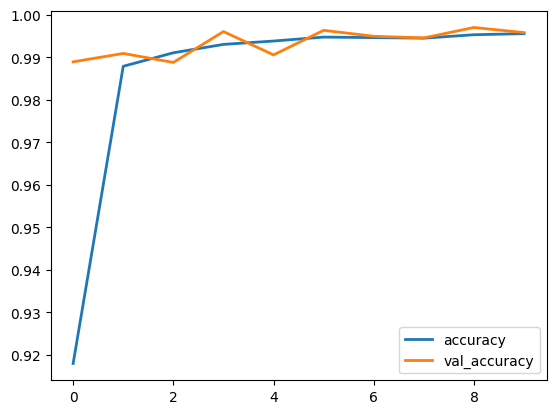

In [19]:
plt.plot(range(10), _[['accuracy','val_accuracy']], linewidth=2, markersize=1)
plt.legend(['accuracy','val_accuracy'])

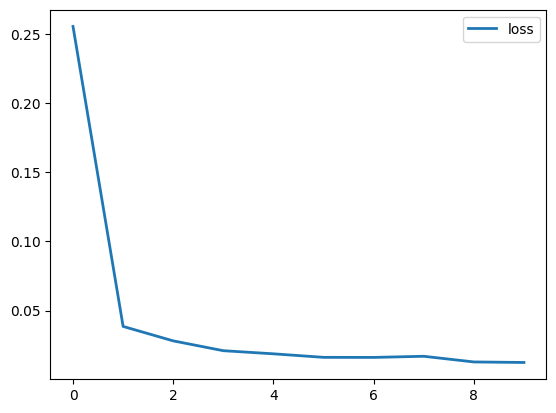

In [20]:
plt.plot(range(10), _['loss'], linewidth=2, markersize=1)
plt.legend(['loss'])

In [21]:
y__= model.predict(X_test1)

1219/1219 [==============================] - 2s 2ms/step


In [22]:
y__.shape

(39000, 13)

In [23]:
y1= np.zeros((39000,1))
for i in range(len(y__)):
  y1[i]= np.where(y__[i]==max(y__[i]))

<ipython-input-23-2844113db797>:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y1[i]= np.where(y__[i]==max(y__[i]))


In [24]:
y2=enc.inverse_transform(y1)

In [25]:
y_pred=pd.DataFrame(y2)
y_pred.columns = ['Object_Held']

In [26]:
accuracy_score(y_test1, y_pred)

0.9945897435897436

In [27]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test1, y_pred, average='macro'),"\n")

print(precision_recall_fscore_support(y_test1, y_pred, average='micro'),"\n")

print(precision_recall_fscore_support(y_test1, y_pred, average='weighted'), "\n")

(0.9946566050090462, 0.9945897435897437, 0.994588430942765, None) 

(0.9945897435897436, 0.9945897435897436, 0.9945897435897436, None) 

(0.9946566050090463, 0.9945897435897436, 0.994588430942765, None) 



In [28]:
y__2= model.predict(X_test2)

1219/1219 [==============================] - 2s 2ms/step


In [29]:
y5= np.zeros((39000,1))
for i in range(len(y__2)):
  y5[i]= np.where(y__2[i]==max(y__2[i]))

<ipython-input-29-b2cf310bc187>:3: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y5[i]= np.where(y__2[i]==max(y__2[i]))


In [30]:
y6=enc.inverse_transform(y5)

In [31]:
y_pred2=pd.DataFrame(y6)
y_pred2.columns = ['Object_Held']

In [32]:
accuracy_score(y_test2, y_pred2)

0.9787435897435898

In [33]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test2, y_pred2, average='macro'),"\n")

print(precision_recall_fscore_support(y_test2, y_pred2, average='micro'),"\n")

print(precision_recall_fscore_support(y_test2, y_pred2, average='weighted'), "\n")

(0.9788343647000155, 0.9787435897435899, 0.9786942546718354, None) 

(0.9787435897435898, 0.9787435897435898, 0.9787435897435898, None) 

(0.9788343647000155, 0.9787435897435898, 0.9786942546718354, None) 

